# Remove horizontal lines from Image

load image XrayHistEqual.jpg : a(x,y)

Xray.jpg

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from lib.helpersmd import readFromDat
%matplotlib inline

In [2]:
def getCoefficientsFFT(arr):
    fft1=np.fft.fft(arr)
    fft1=fft1[:fft1.shape[0]/2]
    ret=np.sqrt(np.power(np.real(fft1),2)+np.power(np.imag(fft1),2))
    return ret

## Explore Image

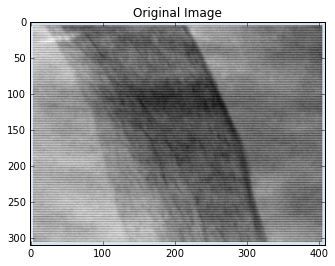

In [3]:
from PIL import Image
a1 = np.array(Image.open("./data/Xray/v400x300.jpg"))
plt.figure()
plt.title("Original Image")
imshow(a1,cmap='gray')

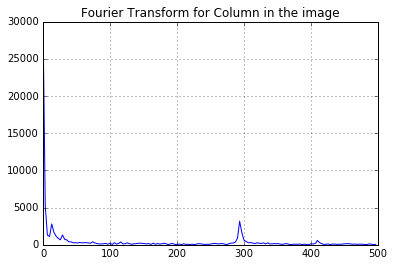

In [4]:
from lib.signalprocessingmd import getScaledDomain

l200=a1[:,220,0]
processed=l200[1:]-l200[:-1]
fft=getCoefficientsFFT(l200)

# control parameters
dt=0.001   # sampling period
#  Input Signal
NS=310    # number of samples in input signal
fscaledS=getScaledDomain(dt,NS)[:NS/2]  # scaled domain for input signal spectur


plt.figure()
plt.plot(fscaledS,fft)
plt.grid()
plt.title("Fourier Transform for Column in the image")
plt.show()

## Process the image

1. Determine the corresponding frequency (of the lines) to be removed

2. Construct BSF filter

3. Convolve the filter with the columns of the original image

In [5]:
from lib.signalprocessingmd import fourierTransform,convolution,getScaledDomain
from lib.plotmd import plot2D,plotVector,plotHelper

# control parameters
dt=0.001   # sampling period
#  Input Signal
NS=310    # number of samples in input signal
fscaledS=getScaledDomain(dt,NS)[:NS/2]  # scaled domain for input signal spectur
# Filters
m=128      # m samples to form the right part of the filter , because the filter is symmetric
NF=2*m+1   # NF is the total size of the filter
fscaledF=getScaledDomain(dt,NF)[:NF/2]  #scaled domain for the filters spectur

In [6]:
xn=a1[:,100,0] # column from the image
_,Xn=fourierTransform(xn)
Xn=Xn[:NS/2]

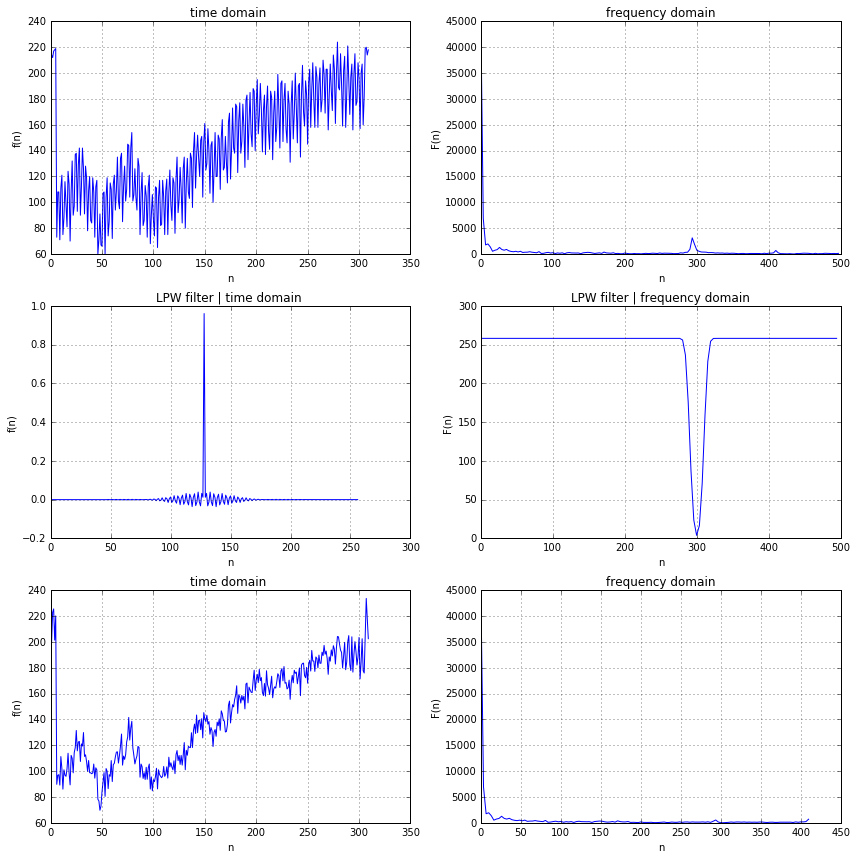

In [7]:
# Construct BSF filter to remove the corresponding frequency

from lib.filtersmd import bsf
fc1=290
fc2=310
bsw=bsf(fc1,fc2,m,dt)
_,Cn_bsw=fourierTransform(bsw)
Cn_bsw=Cn_bsw[:NF/2]*(NF+1)

yn_bsw=convolution(xn,bsw)[m:-m]
_,Yn_bsw=fourierTransform(yn_bsw)
Yn_bsw=Yn_bsw[:NF/2]
plotHelper(xn,Xn,bsw,Cn_bsw,yn_bsw,Yn_bsw,dt,"LPW filter")

In [8]:
# Using convolution with fitler to remove the frequency of the lines
from lib.signalprocessingmd import convolution
newimg=np.zeros_like(a1)
for j in range(newimg.shape[1]):
    for k in range(newimg.shape[2]):
        newimg[:,j,k]=convolution(a1[:,j,k],bsw)[m:-m]

## Show results

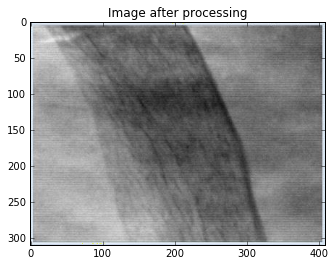

In [9]:
plt.figure()
plt.title("Image after processing")
imshow(newimg)